In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
url="https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-MEDIAN.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['DiabetesPedigreeFunction'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,50,1
1,1,85.0,66.0,29.0,125.0,26.6,31,0
2,8,183.0,64.0,29.0,125.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,63,0
764,2,122.0,70.0,27.0,125.0,36.8,27,0
765,5,121.0,72.0,23.0,112.0,26.2,30,0
766,1,126.0,60.0,29.0,125.0,30.1,47,1


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.025597,0.312038
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.238356,1.000000


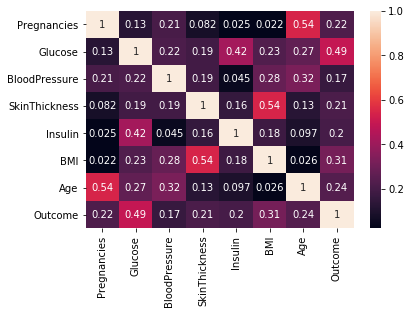

In [5]:
sb.heatmap(df.corr(), annot=True)

In [6]:
labels = df.loc[:,'Outcome'].values
features = df.loc[:,df.columns!='Outcome'].values
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

268 500


In [7]:
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(features)
y=labels

In [8]:
xTrain,xTest,yTrain,yTest=tts(x, y, test_size=0.2, random_state=69)

In [9]:
clf=LogisticRegression()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [10]:
clf=RandomForestClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [11]:
clf=SVC()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [12]:
clf=KNeighborsClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [13]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = dtree.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        99
           1       0.68      0.75      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



In [14]:
clf=BaggingClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

